# 2 Modifications

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

import generator

%config InlineBackend.figure_format='retina'

## 2.1 Noisy Case

In [2]:
FEATURES = 100
SAMPLES = 40000
THETA = 0.3

observations, true_dictionary, true_samples = \
    generator.random_dictionary_learning_instance(
        FEATURES, SAMPLES, THETA)

### 2.1.1 Non-Noisy Sanity Check

In [3]:
ITERATIONS = 30

observation_matches = []
true_matches = []

updates = generator.get_dictionary_learning_iterates(observations)
for current in itertools.islice(updates, ITERATIONS):
    value = generator.sum_of_fourth_powers(current @ observations) 
    value /= (3 * FEATURES * SAMPLES * THETA)
    observation_matches.append(value)

    value = generator.sum_of_fourth_powers(current @ true_dictionary)
    value /= FEATURES
    true_matches.append(value)

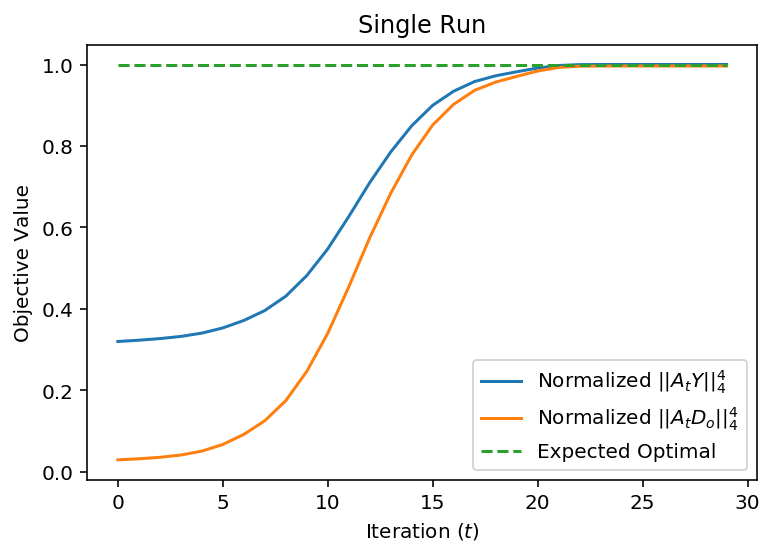

In [4]:
scale = np.arange(ITERATIONS)
plt.plot(scale, observation_matches)
plt.plot(scale, true_matches)
plt.plot(scale, np.ones(ITERATIONS), linestyle='--')

plt.title('Single Run')
plt.xlabel('Iteration ($t$)')
plt.ylabel('Objective Value')
plt.legend(['Normalized $|| A_t Y||_4^4$', 'Normalized $|| A_t D_o||_4^4$', 'Expected Optimal'])
plt.show()

### 2.1.1 MSP on Noisy Observations

In [5]:
NOISE_SCALE = 0.6

noisy = observations + \
    np.random.normal(scale=NOISE_SCALE, size=observations.shape)

In [6]:
ITERATIONS = 150

observation_matches = []
clean_matches = []
true_matches = []

add_scale = np.sqrt(1 + NOISE_SCALE ** 2)
large_expectation = THETA * FEATURES * SAMPLES * 3 * (add_scale ** 4)
small_expectation = (1 - THETA) * FEATURES * SAMPLES * 3 * (NOISE_SCALE ** 4)

updates = generator.get_dictionary_learning_iterates(noisy)
for current in itertools.islice(updates, ITERATIONS):
    value = generator.sum_of_fourth_powers(current @ noisy)
    value /= small_expectation + large_expectation
    observation_matches.append(value)
    
    value = generator.sum_of_fourth_powers(current @ observations)
    value /= (3 * FEATURES * SAMPLES * THETA)
    clean_matches.append(value)

    value = generator.sum_of_fourth_powers(current @ true_dictionary)
    value /= FEATURES
    true_matches.append(value)

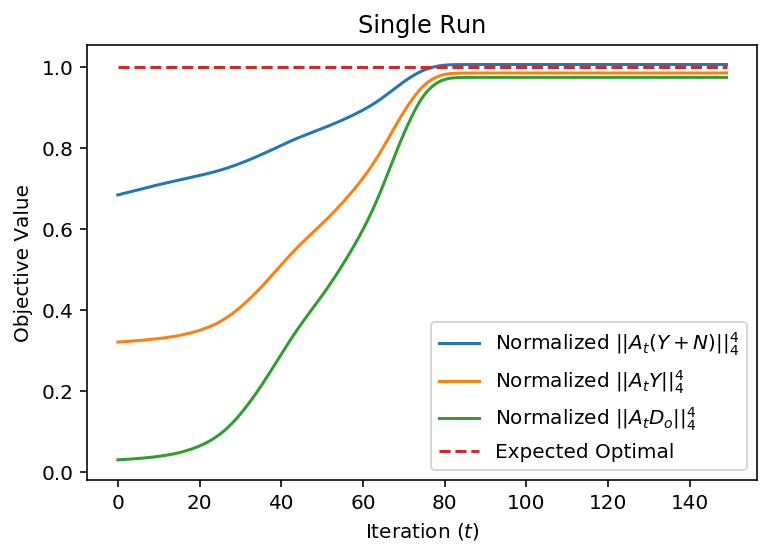

In [7]:
scale = np.arange(ITERATIONS)
plt.plot(scale, observation_matches)
plt.plot(scale, clean_matches)
plt.plot(scale, true_matches)
plt.plot(scale, np.ones(ITERATIONS), linestyle='--')

plt.title('Single Run')
plt.xlabel('Iteration ($t$)')
plt.ylabel('Objective Value')
plt.legend([
    'Normalized $|| A_t (Y + N) ||_4^4$',
    'Normalized $|| A_t Y ||_4^4$',
    'Normalized $|| A_t D_o ||_4^4$',
    'Expected Optimal']
)
plt.show()

### 2.1.2 Parameter Grid

In [ ]:
FEATURES = 100
THETA = 0.3
ITERATIONS = 100
REPLICATES = 5
# SAMPLES, NOISE_SCALE

samples_list = np.arange(1000, 10000, 10000)
noise_scale_list = np.linspace(0, 1, num=11)
samples_and_noise_results = []

for samples in samples_list:
    for noise_scale in noise_scale_list:
        
        result = 0
        for _ in range(REPLICATES):
            observations, dictionary, _ = \
                generator.random_dictionary_learning_instance(
                FEATURES,
                samples,
                THETA)
            noisy = observations + np.random.normal(
                scale=noise_scale,
                size=observations.shape)
            updates = generator.get_dictionary_learning_iterates(noisy)
            current = next(itertools.islice(updates, ITERATIONS, None))
            
            value = generator.sum_of_fourth_powers(current @ dictionary)
            value /= FEATURES
            result += value
        
        entry = {
            'features': FEATURES,
            'theta': THETA,
            'iterations': ITERATIONS,
            'replicates': REPLICATES,
            'samples': samples,
            'noise_scale': noise_scale,
            'value': result / REPLICATES
        }
        # print(entry)
        samples_and_noise_results.append(entry)

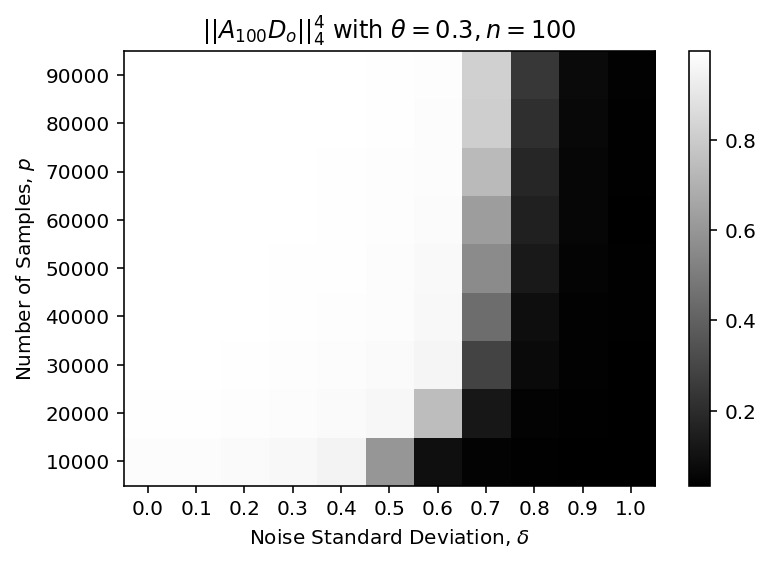

In [90]:
color_grid = np.zeros((
    len(samples_list),
    len(noise_scale_list)))

for entry in samples_and_noise_results:
    row = np.where(samples_list == entry['samples'])[0][0]
    col = np.where(noise_scale_list == entry['noise_scale'])[0][0]
    color_grid[row][col] = entry['value']

color_grid = np.flip(color_grid, 0)

plt.imshow(color_grid, cmap='gray')
plt.xticks(
    np.arange(len(noise_scale_list)),
    np.round(noise_scale_list, 1))
plt.yticks(
    np.arange(len(samples_list)),
    np.flip(samples_list)
)

plt.title('$||A_{100} D_o||_4^4$ with $\\theta = 0.3, n = 100$')
plt.xlabel('Noise Standard Deviation, $\delta$')
plt.ylabel('Number of Samples, $p$')
plt.colorbar()
plt.show()

In [ ]:
FEATURES = 100
ITERATIONS = 100
REPLICATES = 5
SAMPLES = 30000
# THETA, NOISE_SCALE

sparsity_list = np.linspace(0.1, 1, num=10)
noise_scale_list = np.linspace(0, 1, num=11)
sparsity_and_noise_results = []

for theta in sparsity_list:
    for noise_scale in noise_scale_list:
        
        result = 0
        for _ in range(REPLICATES):
            observations, dictionary, _ = \
                generator.random_dictionary_learning_instance(
                FEATURES,
                SAMPLES,
                theta)
            noisy = observations + np.random.normal(
                scale=noise_scale,
                size=observations.shape)
            updates = generator.get_dictionary_learning_iterates(noisy)
            current = next(itertools.islice(updates, ITERATIONS, None))
            
            value = generator.sum_of_fourth_powers(current @ dictionary)
            value /= FEATURES
            result += value
        
        entry = {
            'features': FEATURES,
            'theta': theta,
            'iterations': ITERATIONS,
            'replicates': REPLICATES,
            'samples': SAMPLES,
            'noise_scale': noise_scale,
            'value': result / REPLICATES
        }
        # print(entry)
        sparsity_and_noise_results.append(entry)

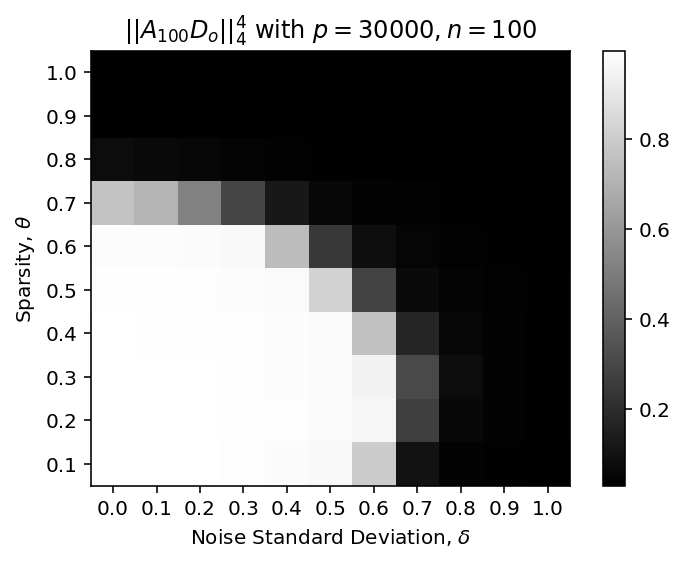

In [95]:
color_grid = np.zeros((
    len(sparsity_list),
    len(noise_scale_list)))

for entry in sparsity_and_noise_results:
    row = np.where(sparsity_list == entry['theta'])[0][0]
    col = np.where(noise_scale_list == entry['noise_scale'])[0][0]
    color_grid[row][col] = entry['value']

color_grid = np.flip(color_grid, 0)

plt.imshow(color_grid, cmap='gray')
plt.xticks(
    np.arange(len(noise_scale_list)),
    np.round(noise_scale_list, 1))
plt.yticks(
    np.arange(len(sparsity_list)),
    np.flip(np.round(sparsity_list, 1))
)

plt.title('$||A_{100} D_o||_4^4$ with $p = 30000, n = 100$')
plt.xlabel('Noise Standard Deviation, $\delta$')
plt.ylabel('Sparsity, $\\theta$')
plt.colorbar()
plt.show()